## Disease Prediction Using Decision Tree, Random Forest, Naive Bayes Classifier, Support Vector Machines, XGBoost Classifier and Stacked Classifier

The dataset has features in the form of various symptoms (like fever, headache etc) while the label is disease. So the objective of this project is to predict the correct disease based on the simultaneous occurence of one of more of symptoms detected in patient.

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv(r'C:\Users\Furquan\OneDrive\Documents\GitHub\Machine-Learning-Projects\Project3-DiseasePrediction\improved_disease_dataset.csv')
data

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes,disease
0,1,0,1,0,1,0,0,1,1,0,Paralysis (brain hemorrhage)
1,0,0,1,0,0,0,1,1,0,0,Paralysis (brain hemorrhage)
2,0,0,1,0,1,0,1,1,0,0,Paralysis (brain hemorrhage)
3,0,0,1,1,1,0,1,1,1,1,Paralysis (brain hemorrhage)
4,1,0,1,0,1,0,0,0,1,1,Paralysis (brain hemorrhage)
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,1,0,0,1,0,0,0,1,1,Alcoholic hepatitis
1996,1,0,0,0,1,1,1,0,1,1,Alcoholic hepatitis
1997,1,0,0,1,0,0,0,0,0,1,Alcoholic hepatitis
1998,0,0,0,0,1,1,0,0,0,1,Alcoholic hepatitis


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   fever        2000 non-null   int64 
 1   headache     2000 non-null   int64 
 2   nausea       2000 non-null   int64 
 3   vomiting     2000 non-null   int64 
 4   fatigue      2000 non-null   int64 
 5   joint_pain   2000 non-null   int64 
 6   skin_rash    2000 non-null   int64 
 7   cough        2000 non-null   int64 
 8   weight_loss  2000 non-null   int64 
 9   yellow_eyes  2000 non-null   int64 
 10  disease      2000 non-null   object
dtypes: int64(10), object(1)
memory usage: 172.0+ KB


In [4]:
data['disease'].value_counts()

disease
Paralysis (brain hemorrhage)                      90
Hypertension                                      80
Hepatitis B                                       80
Impetigo                                          80
Chronic cholestasis                               70
Hepatitis C                                       70
Typhoid                                           70
Dimorphic hemorrhoids(piles)                      70
Vertigo (Benign paroxysmal Positional Vertigo)    70
Cervical spondylosis                              70
Tuberculosis                                      70
Hyperthyroidism                                   70
Malaria                                           60
Gastroenteritis                                   60
Osteoarthritis                                    60
Heart attack                                      60
Dengue                                            50
Pneumonia                                         50
Urinary tract infection               

In [5]:
data['disease'].unique()

array(['Paralysis (brain hemorrhage)', 'Hypertension', 'Hepatitis B',
       'Impetigo', 'Chronic cholestasis', 'Hepatitis C', 'Typhoid',
       'Dimorphic hemorrhoids(piles)',
       'Vertigo (Benign paroxysmal Positional Vertigo)',
       'Cervical spondylosis', 'Tuberculosis', 'Hyperthyroidism',
       'Malaria', 'Gastroenteritis', 'Osteoarthritis', 'Heart attack',
       'Dengue', 'Pneumonia', 'Urinary tract infection', 'Hypoglycemia',
       'Bronchial Asthma', 'Arthritis', 'Hepatitis D', 'Hypothyroidism',
       'Acne', 'GERD', 'Peptic ulcer disease', 'Psoriasis',
       'Drug Reaction', 'Diabetes', 'Varicose veins', 'Hepatitis A',
       'Hepatitis E', 'Migraine', 'Allergy', 'Jaundice', 'AIDS',
       'Alcoholic hepatitis'], dtype=object)

In [6]:
len(data['disease'].unique())

38

## Converting the Target Column 'Disease' from String to Integer value by applying Label Encoder from Sklearn

In [7]:
encoder = LabelEncoder()
data['disease'] = encoder.fit_transform(data['disease'])
data

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes,disease
0,1,0,1,0,1,0,0,1,1,0,29
1,0,0,1,0,0,0,1,1,0,0,29
2,0,0,1,0,1,0,1,1,0,0,29
3,0,0,1,1,1,0,1,1,1,1,29
4,1,0,1,0,1,0,0,0,1,1,29
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,1,0,0,1,0,0,0,1,1,2
1996,1,0,0,0,1,1,1,0,1,1,2
1997,1,0,0,1,0,0,0,0,0,1,2
1998,0,0,0,0,1,1,0,0,0,1,2


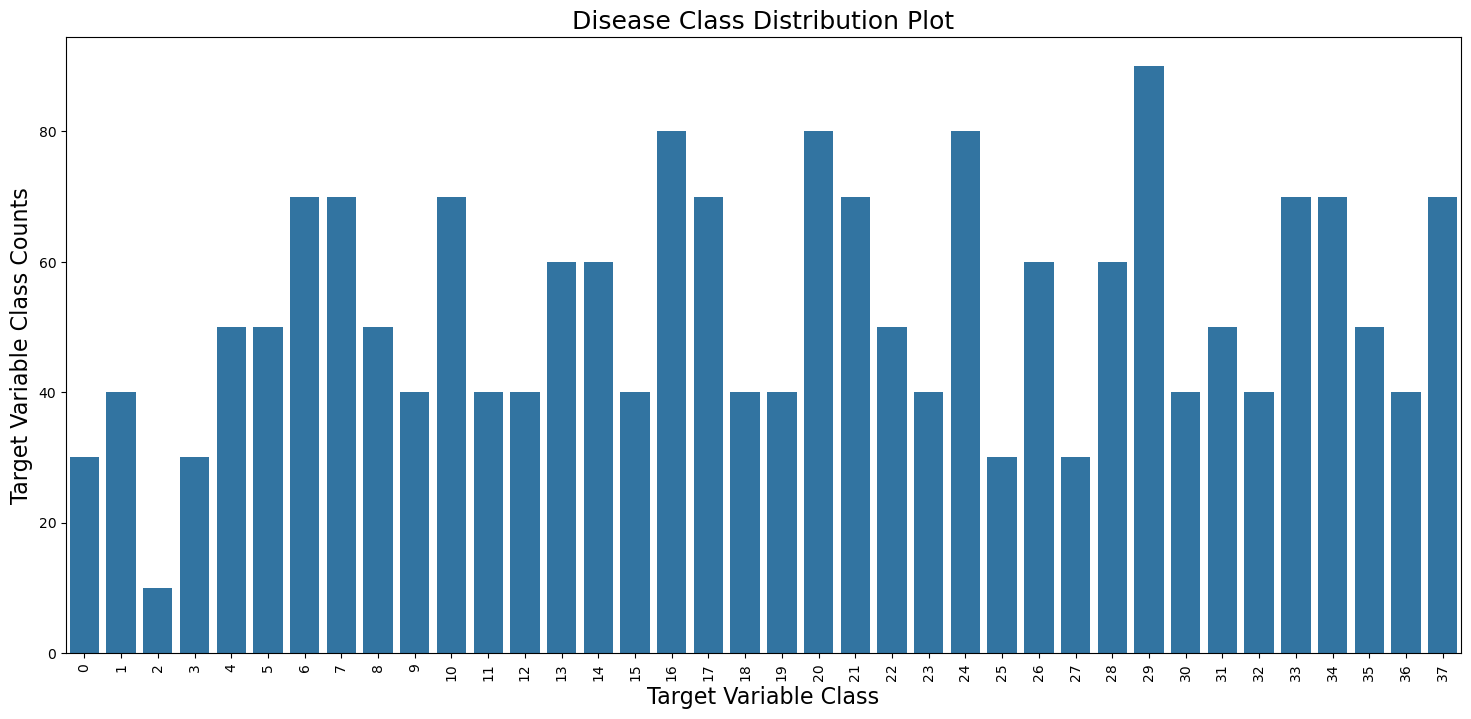

In [8]:
#Defining X and Y as features and Target variable
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

#Plotting the disease class distruibution in a bar graph to check imbalance in data
plt.figure(figsize = (18,8))
sns.countplot(x=Y)
plt.title('Disease Class Distribution Plot', fontsize=18)
plt.xlabel('Target Variable Class', fontsize=16)
plt.ylabel('Target Variable Class Counts', fontsize=16)
plt.xticks(rotation=90)
plt.show()

## Oversampling to overcome Target Variable Class Imbalance

In [9]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled,Y_resampled = ros.fit_resample(X,Y)

print("Resampled Class Distribution:\n",
      pd.Series(Y_resampled).value_counts())

Resampled Class Distribution:
 disease
29    90
20    90
16    90
24    90
7     90
17    90
34    90
10    90
37    90
6     90
33    90
21    90
26    90
13    90
28    90
14    90
8     90
31    90
35    90
22    90
5     90
4     90
18    90
23    90
1     90
12    90
30    90
32    90
11    90
9     90
36    90
15    90
19    90
27    90
3     90
25    90
0     90
2     90
Name: count, dtype: int64


# Cross-Validation with Stratified K-Fold

We use Stratified K-Fold Cross-Validation to evaluate three machine learning models. The number of splits is set to 2 to accommodate smaller class sizes

In [10]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

cv_scoring = 'accuracy'  # you can also use 'f1_weighted', 'roc_auc_ovr' for multi-class
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model in models.items():
    try:
        scores = cross_val_score(
            model,
            X_resampled,
            y_resampled,
            cv=stratified_kfold,
            scoring=cv_scoring,
            n_jobs=-1,
            error_score='raise' 
        )
        print("=" * 50)
        print(f"Model: {model_name}")
        print(f"Scores: {scores}")
        print(f"Mean Accuracy: {scores.mean():.4f}")
    except Exception as e:
        print("=" * 50)
        print(f"Model: {model_name} failed with error:")
        print(e)

Model: Decision Tree failed with error:
name 'y_resampled' is not defined
Model: Random Forest failed with error:
name 'y_resampled' is not defined


for model_name, model in models.items():
    try:
        scores = cross_val_score(
            model,
            X_resampled,
            Y_resampled,
            cv=stratified_kfold,
            scoring=cv_scoring,
            n_jobs=-1,
            error_score='raise' 
        )
        print("=" * 50)
        print(f"Model: {model_name}")
        print(f"Scores: {scores}")
        print(f"Mean Accuracy: {scores.mean():.4f}")
    except Exception as e:
        print("=" * 50)
        print(f"Model: {model_name} failed with error:")
        print(e)

Conclusion:
1) There is not much difference in the accuracy obtained from the two models and Random forest is found to be marginally better than Decision Tress Classifier
2) Cross validation results accuracy also found to be good across all the K-Folds.

## Support Vector Classifier (SVC)

In [11]:
model_SVC = SVC()
model_SVC.fit(X_resampled,Y_resampled)
pred_mod_SVC = model_SVC.predict(X_resampled)

In [12]:
print('='*60)
print(classification_report(Y_resampled,pred_mod_SVC))
print('='*60)
print(confusion_matrix(Y_resampled,pred_mod_SVC))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        90
           1       0.58      0.66      0.61        90
           2       0.75      0.92      0.83        90
           3       0.59      0.67      0.62        90
           4       0.64      0.51      0.57        90
           5       0.50      0.60      0.55        90
           6       0.64      0.60      0.62        90
           7       0.51      0.46      0.48        90
           8       0.50      0.43      0.46        90
           9       0.71      0.72      0.71        90
          10       0.47      0.60      0.53        90
          11       0.72      0.77      0.74        90
          12       0.63      0.72      0.67        90
          13       0.63      0.53      0.58        90
          14       0.66      0.63      0.64        90
          15       0.79      0.63      0.70        90
          16       0.57      0.52      0.55        90
          17       0.63    

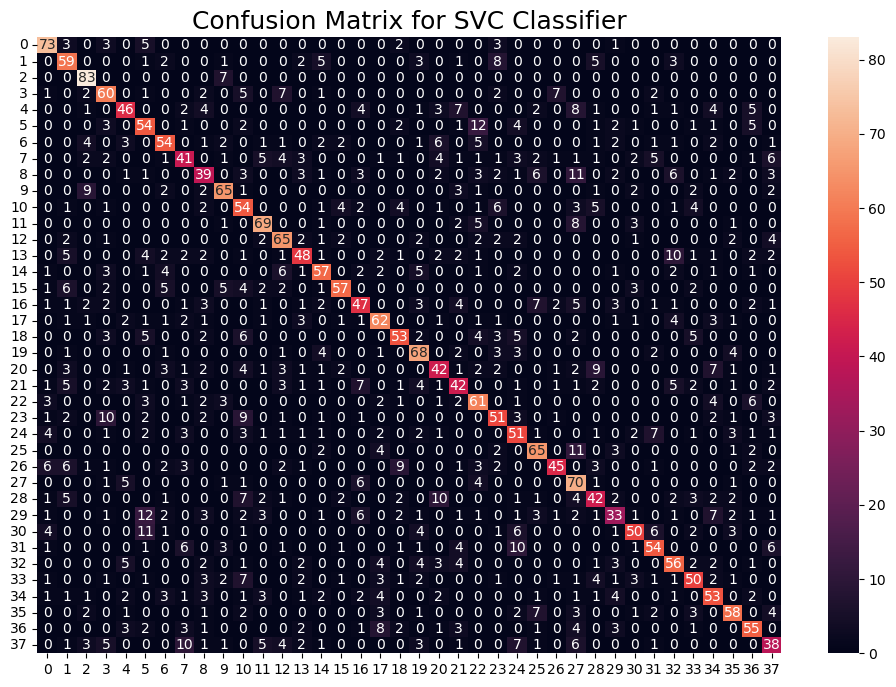

In [13]:
#Lets plot the confusion matrix
cf_matrix = confusion_matrix(Y_resampled,pred_mod_SVC)
plt.figure(figsize=(12,8))
plt.title('Confusion Matrix for SVC Classifier', fontsize = 18)
sns.heatmap(cf_matrix, annot=True, fmt='d')
plt.show()

In [14]:
print(f'SVM Accuracy: {accuracy_score(Y_resampled,pred_mod_SVC)*100:0.2f}%')

SVM Accuracy: 60.53%


## Gaussian Naive Bayes Classifier

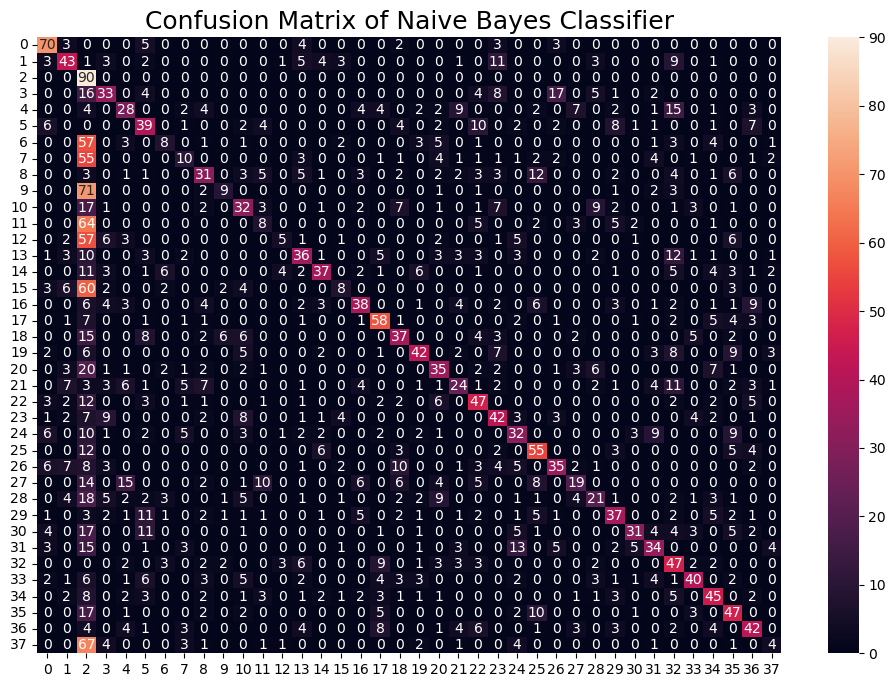

In [15]:
model_nb = GaussianNB()
model_nb.fit(X_resampled,Y_resampled)
model_nb_pred = model_nb.predict(X_resampled)

cf_marix_nb = confusion_matrix(Y_resampled, model_nb_pred)
plt.figure(figsize = (12,8))
plt.title('Confusion Matrix of Naive Bayes Classifier', fontsize = 18)
sns.heatmap(cf_marix_nb, annot=True, fmt = 'd')
plt.show()

In [16]:
#Accuracy Score
print(f'Gaussian Naive Bayes Classifier Accuracy Score: {accuracy_score(Y_resampled,model_nb_pred)*100:0.2f}%')

Gaussian Naive Bayes Classifier Accuracy Score: 37.98%


Conclusion:
1) The Confusion matrix predictts so many off diagonal values which means model is more erroneous than SVC
2) Model accuracy is also very low as compared to the other models

## Random forest Classifier

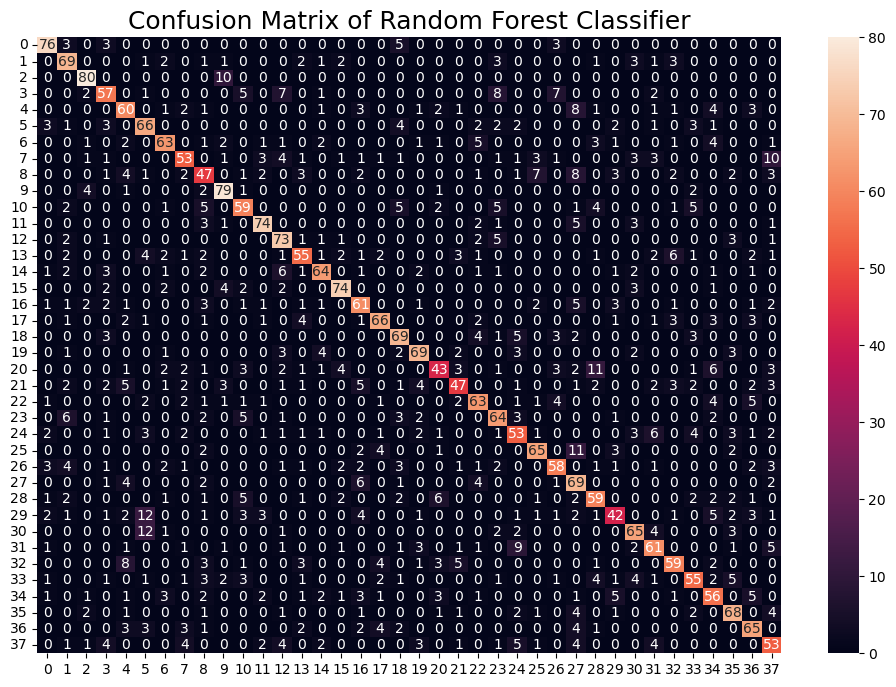

In [17]:
model_RFC = RandomForestClassifier()
model_RFC.fit(X_resampled,Y_resampled)
model_RFC_pred = model_RFC.predict(X_resampled)
Conf_Mat_RFC = confusion_matrix(Y_resampled,model_RFC_pred)
plt.figure(figsize = (12,8))
plt.title("Confusion Matrix of Random Forest Classifier", fontsize = 18)
sns.heatmap(Conf_Mat_RFC, annot=True, fmt='d')
plt.show()

In [18]:
#Accuracy score
print(f'Random forest classifier Accuracy: {accuracy_score(Y_resampled,model_RFC_pred)*100:0.2f}%')

Random forest classifier Accuracy: 68.98%


Conclusion:
1) The Random forest classier shows much better results so far.
2) The results are much better than that of Random forest with Stratified K-fold Splits.

## Extreme Gradient Boost Classifier (XGboost)

C:\Users\Furquan\anaconda3\envs\anaconda-ml-ai\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:24:25] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


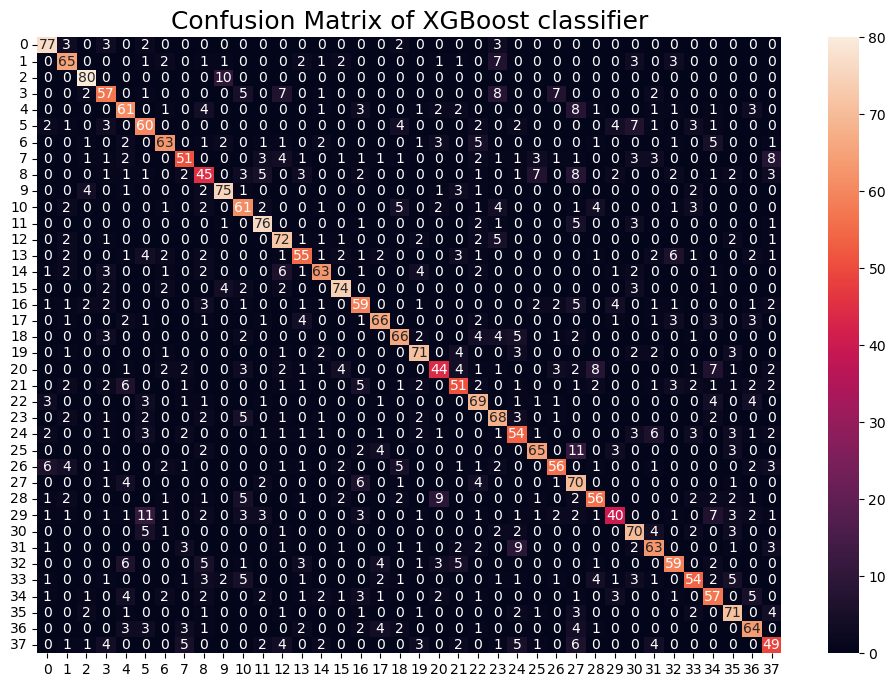

In [19]:
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model_xgb.fit(X_resampled,Y_resampled)
model_xgb_pred = model_xgb.predict(X_resampled)

Conf_mat_xgb = confusion_matrix(Y_resampled,model_xgb_pred)
plt.figure(figsize = (12,8))
plt.title('Confusion Matrix of XGBoost classifier',fontsize=18)
sns.heatmap(Conf_mat_xgb, annot=True, fmt = 'd')
plt.show()

In [20]:
print(f'XGBoost Classifier Accuracy: {accuracy_score(Y_resampled,model_xgb_pred)*100:0.2f}%')

XGBoost Classifier Accuracy: 68.92%


Conclusion: 
1) XGBoost classifier results are very close to Random Forest Classifier results
2) However, the result from Random forest classifier is marginally better than the that of XGBoost classifier.

## Stacking Classifier - Combining multiple models and then using Logistic Regression as the Final estimator

C:\Users\Furquan\anaconda3\envs\anaconda-ml-ai\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:24:33] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Furquan\anaconda3\envs\anaconda-ml-ai\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:24:54] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Furquan\anaconda3\envs\anaconda-ml-ai\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:25:00] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Furquan\anaconda3\envs\anaconda-ml-ai\Lib\site-packages\xgboost\training.py:183: UserWarning: [03

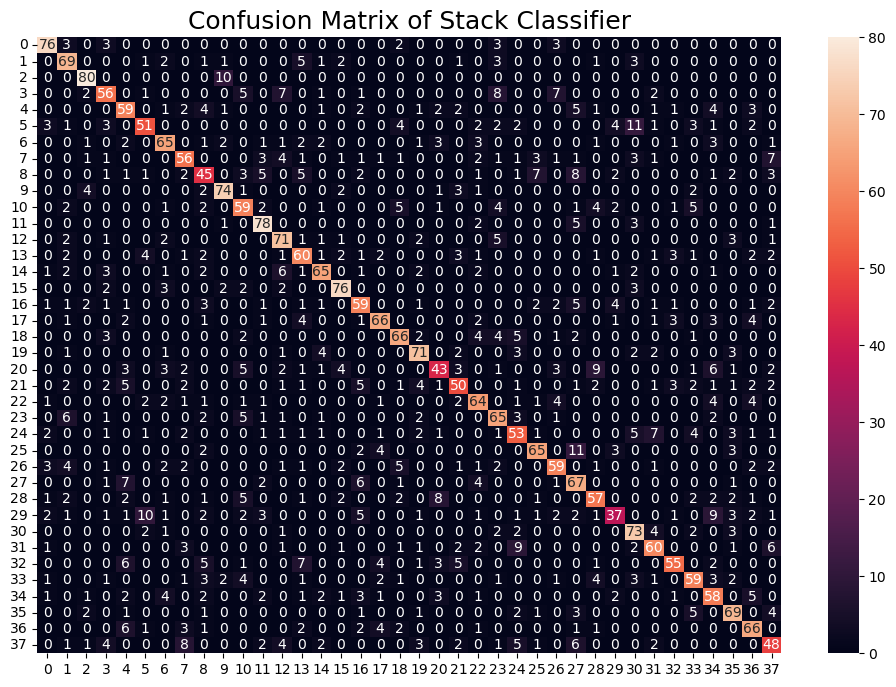

In [21]:
base_models = [
    ('svc', SVC(probability=True)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
]

meta_model = LogisticRegression(max_iter=1000)

stack = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
stack.fit(X_resampled, Y_resampled)
stack_pred = stack.predict(X_resampled)

Conf_mat_stack = confusion_matrix(Y_resampled,stack_pred)
plt.figure(figsize=(12,8))
plt.title('Confusion Matrix of Stack Classifier', fontsize=18)
sns.heatmap(Conf_mat_stack , annot=True, fmt = 'd')
plt.show()

In [27]:
print(f'Stacked Classifier Accuracy: {accuracy_score(Y_resampled,stack_pred)*100:0.2f}%')

Stacked Classifier Accuracy: 68.71%


## Final Conclusion

1) The results from Random forest, XGBoost and Stacked classifier are very closed to each other.
2) The best result is prediced from the Random Forest classifier with an accuracy score of 68.98%.